**Important: This notebook will only work with fastai-0.7.x. Do not try to run any fastai-1.x code from this path in the repository because it will load fastai-0.7.x**

# Intro to Random Forests

## About this course

### Teaching approach

This course is being taught by Jeremy Howard, and was developed by Jeremy along with Rachel Thomas. Rachel has been dealing with a life-threatening illness so will not be teaching as originally planned this year.

Jeremy has worked in a number of different areas - feel free to ask about anything that he might be able to help you with at any time, even if not directly related to the current topic:

- Management consultant (McKinsey; AT Kearney)
- Self-funded startup entrepreneur (Fastmail: first consumer synchronized email; Optimal Decisions: first optimized insurance pricing)
- VC-funded startup entrepreneur: (Kaggle; Enlitic: first deep-learning medical company)

I'll be using a *top-down* teaching method, which is different from how most math courses operate.  Typically, in a *bottom-up* approach, you first learn all the separate components you will be using, and then you gradually build them up into more complex structures.  The problems with this are that students often lose motivation, don't have a sense of the "big picture", and don't know what they'll need.

If you took the fast.ai deep learning course, that is what we used.  You can hear more about my teaching philosophy [in this blog post](http://www.fast.ai/2016/10/08/teaching-philosophy/) or [in this talk](https://vimeo.com/214233053).

Harvard Professor David Perkins has a book, [Making Learning Whole](https://www.amazon.com/Making-Learning-Whole-Principles-Transform/dp/0470633719) in which he uses baseball as an analogy.  We don't require kids to memorize all the rules of baseball and understand all the technical details before we let them play the game.  Rather, they start playing with a just general sense of it, and then gradually learn more rules/details as time goes on.

All that to say, don't worry if you don't understand everything at first!  You're not supposed to.  We will start using some "black boxes" such as random forests that haven't yet been explained in detail, and then we'll dig into the lower level details later.

To start, focus on what things DO, not what they ARE.

### Your practice

People learn by:
1. **doing** (coding and building)
2. **explaining** what they've learned (by writing or helping others)

Therefore, we suggest that you practice these skills on Kaggle by:
1. Entering competitions (*doing*)
2. Creating Kaggle kernels (*explaining*)

It's OK if you don't get good competition ranks or any kernel votes at first - that's totally normal! Just try to keep improving every day, and you'll see the results over time.

To get better at technical writing, study the top ranked Kaggle kernels from past competitions, and read posts from well-regarded technical bloggers. Some good role models include:

- [Peter Norvig](http://nbviewer.jupyter.org/url/norvig.com/ipython/ProbabilityParadox.ipynb) (more [here](http://norvig.com/ipython/))
- [Stephen Merity](https://smerity.com/articles/2017/deepcoder_and_ai_hype.html)
- [Julia Evans](https://codewords.recurse.com/issues/five/why-do-neural-networks-think-a-panda-is-a-vulture) (more [here](https://jvns.ca/blog/2014/08/12/what-happens-if-you-write-a-tcp-stack-in-python/))
- [Julia Ferraioli](http://blog.juliaferraioli.com/2016/02/exploring-world-using-vision-twilio.html)
- [Edwin Chen](http://blog.echen.me/2014/10/07/moving-beyond-ctr-better-recommendations-through-human-evaluation/)
- [Slav Ivanov](https://blog.slavv.com/picking-an-optimizer-for-style-transfer-86e7b8cba84b) (fast.ai student)
- [Brad Kenstler](https://hackernoon.com/non-artistic-style-transfer-or-how-to-draw-kanye-using-captain-picards-face-c4a50256b814) (fast.ai and USF MSAN student)

### Books

The more familiarity you have with numeric programming in Python, the better. If you're looking to improve in this area, we strongly suggest Wes McKinney's [Python for Data Analysis, 2nd ed](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=asap_bc?ie=UTF8).

For machine learning with Python, we recommend:

- [Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Andreas-Mueller/dp/1449369413): From one of the scikit-learn authors, which is the main library we'll be using
- [Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow, 2nd Edition](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939/ref=dp_ob_title_bk): New version of a very successful book. A lot of the new material however covers deep learning in Tensorflow, which isn't relevant to this course
- [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=pd_lpo_sbs_14_t_0?_encoding=UTF8&psc=1&refRID=MBV2QMFH3EZ6B3YBY40K)


### Syllabus in brief

Depending on time and class interests, we'll cover something like (not necessarily in this order):

- Train vs test
  - Effective validation set construction
- Trees and ensembles
  - Creating random forests
  - Interpreting random forests
- What is ML?  Why do we use it?
  - What makes a good ML project?
  - Structured vs unstructured data
  - Examples of failures/mistakes
- Feature engineering
  - Domain specific - dates, URLs, text
  - Embeddings / latent factors
- Regularized models trained with SGD
  - GLMs, Elasticnet, etc (NB: see what James covered)
- Basic neural nets
  - PyTorch
  - Broadcasting, Matrix Multiplication
  - Training loop, backpropagation
- KNN
- CV / bootstrap (Diabetes data set?)
- Ethical considerations

Skip:

- Dimensionality reduction
- Interactions
- Monitoring training
- Collaborative filtering
- Momentum and LR annealing


## Imports

In [0]:
## So this section is basically for pre-loading the existing data and running them through notebook so we can directly start editing the notebook from whichever point we want
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
!pip install fastai==0.7.0
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

     |████████████████████████████████| 122kB 4.7MB/s 
     |████████████████████████████████| 1.5MB 15.0MB/s 
     |████████████████████████████████| 496.4MB 35kB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2660800 sha256=6af1bb75ff738e91237df2f759a54c4a9d1d7070cf305379a6ac8080ae4b0917
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1
  Found existing installation: fastai 1.0.59
    Uninstalling fastai-1.0.59:
      Successfully uninstalled fastai-1.0.59


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [0]:
import pandas as pd
import io
df_raw = pd.read_csv(io.StringIO(uploaded['Train.csv'].decode('utf-8')))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,Na

# Introduction to *Blue Book for Bulldozers*

## About...

### ...our teaching

At fast.ai we have a distinctive [teaching philosophy](http://www.fast.ai/2016/10/08/teaching-philosophy/) of ["the whole game"](https://www.amazon.com/Making-Learning-Whole-Principles-Transform/dp/0470633719/ref=sr_1_1?ie=UTF8&qid=1505094653).  This is different from how most traditional math & technical courses are taught, where you have to learn all the individual elements before you can combine them (Harvard professor David Perkins call this *elementitis*), but it is similar to how topics like *driving* and *baseball* are taught.  That is, you can start driving without [knowing how an internal combustion engine works](https://medium.com/towards-data-science/thoughts-after-taking-the-deeplearning-ai-courses-8568f132153), and children begin playing baseball before they learn all the formal rules.

### ...our approach to machine learning

Most machine learning courses will throw at you dozens of different algorithms, with a brief technical description of the math behind them, and maybe a toy example. You're left confused by the enormous range of techniques shown and have little practical understanding of how to apply them.

The good news is that modern machine learning can be distilled down to a couple of key techniques that are of very wide applicability. Recent studies have shown that the vast majority of datasets can be best modeled with just two methods:

- *Ensembles of decision trees* (i.e. Random Forests and Gradient Boosting Machines), mainly for structured data (such as you might find in a database table at most companies)
- *Multi-layered neural networks learnt with SGD* (i.e. shallow and/or deep learning), mainly for unstructured data (such as audio, vision, and natural language)

In this course we'll be doing a deep dive into random forests, and simple models learnt with SGD. You'll be learning about gradient boosting and deep learning in part 2.

### ...this dataset

We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration.  The data is sourced from auction result postings and includes information on usage and equipment configurations."

This is a very common type of dataset and prediciton problem, and similar to what you may see in your project or workplace.

### ...Kaggle Competitions

Kaggle is an awesome resource for aspiring data scientists or anyone looking to improve their machine learning skills.  There is nothing like being able to get hands-on practice and receiving real-time feedback to help you improve your skills.

Kaggle provides:

1. Interesting data sets
2. Feedback on how you're doing
3. A leader board to see what's good, what's possible, and what's state-of-art.
4. Blog posts by winning contestants share useful tips and techniques.

## The data

### Look at the data

Kaggle provides info about some of the fields of our dataset; on the [Kaggle Data info](https://www.kaggle.com/c/bluebook-for-bulldozers/data) page they say the following:

For this competition, you are predicting the sale price of bulldozers sold at auctions. The data for this competition is split into three parts:

- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

- SalesID: the unique identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale

*Question*

What stands out to you from the above description?  What needs to be true of our training and validation sets?

In any sort of data science work, it's **important to look at your data**, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [0]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,11/2/2011 0:00,11/2/2011 0:00,11/2/2011 0:00,10/25/2011 0:00,10/25/2011 0:00


In [0]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2/16/2009 0:00,1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [0]:
import numpy as np
df_raw.SalePrice = np.log(df_raw.SalePrice)
df_raw.SalePrice

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

### Initial processing

## It is important to note here that the sale date column is not an numeric object rather a datetime object and as a result of which directly applying machine learning wont work and therefore can cause issue. As a result of which all the objectst that are string have to be convertied to numeric notations that can be unerstood by the regression model


In [0]:
??add_datepart

In [0]:

df_raw.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
401120     11/2/2011 0:00
401121     11/2/2011 0:00
401122     11/2/2011 0:00
401123    10/25/2011 0:00
401124    10/25/2011 0:00
Name: saledate, Length: 401125, dtype: object

Here we use add_datepart modeul that is a part of fastai library and that would essentially add columns the dataframe(like year,month,day and year end,weekends). The function has already been designed and all we have to do is to get the output correctly


In [0]:
add_datepart(df_raw,'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [0]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [0]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200


As we can see in the above dataframe df_raw, a large number of other columns have been added and this took place becasue of saleYear. Also we are not done, as there are other columns that require to be  processsed suhh as the Usageband


This dataset contains a mix of **continuous** and **categorical** variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals.  You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [0]:
train_cats(df_raw)

We can specify the order to use for categorical variables if we wish: that is when the decision tree splits, it would split first on the basis of High in one category and then Medium and Low in second. Secondly it would split on the basis of Medium in one and High and Low in the secondary category. This doesnt really make sense but the decision tree isnt really sensitive to this. It's okat if we dont change it otherwise we can change it. 

In [0]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [0]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:. inplace = True: this means the changes made will be made on the same dataframe itself

In [0]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest. In the below code we sort the number of rows and find out how many number of rows that have a null value with respect to that of the total number of rows

In [0]:

display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

### Pre-processing

In the future we can simply read it from this fast format.

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [0]:
?proc_df

In [0]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [0]:
df.columns
df.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,2,950,296,41,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,2,1725,527,55,104,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,0,331,110,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,0,3674,1375,0,51,0,6,8,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,1,4208,1529,0,0,0,0,40,32,3,3,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200,False,False


Therefore proc_df what it does is that all of null columns whereever there is a null value it will be replaced with the median of that column and a new column shall also be created called for example auctioneerID and this will be assigned if this value was a null initally or not.
For categorical variables these columns wil be assigned a 0 value and the rest such as High,Medium and Low shall be assigned 1,2,3 and so on depending upon the number of categories

We now have something we can pass to a random forest!

In [0]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9830872752776664

In this we can see that a value of 0.98 is such that it shows very good estimation. The predictor is such that 0 shows bad and 1 shows good

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

Wow, an r^2 of 0.98 - that's great, right? Well, perhaps not...

Possibly **the most important idea** in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it.  And suppose you have lots of parameters:

<img src="https://github.com/fastai/fastai/blob/master/courses/ml1/images/overfitting2.png?raw=1" alt="" style="width: 70%"/>
<center>
[Underfitting and Overfitting](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted)
</center>

The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice.  Why is that?  If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

In [0]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [0]:
len(df)

401125

Here we can see in the above code that the data is split into validation and training.  There is df_raw and df data. The df has no null values. 

# Random Forests

## Base model

Let's try our model again, this time with separate training and validation sets.

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 25s, sys: 91.7 ms, total: 1min 25s
Wall time: 43.9 s
[0.09067013589462138, 0.2472433697533234, 0.9828184096830925, 0.890831515302747]


An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

## Speeding things up
Here what we wee the below code snippet is that inorder to speed up things, we can see that the runtime for the execution of the code is 48.6s and that is a lot of time. Therefore what we first take the first 30000 rows from the df data set and out of which we only take 20000 to be used for training. That is the validation set would be the latest set of 10000 values.

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [0]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.65 s, sys: 6.96 ms, total: 3.66 s
Wall time: 1.97 s
[0.11087723668051291, 0.35625231898414156, 0.9735065104812475, 0.773346007249317]


Therfore we can see that reducing the umber of code snippets greatly increased in the speed in which we can train the model

## Single tree

Here we try to train the data with respect to a single tree and see the score. We can see that the mscore is very less and poor for the validation dataset and therefore we shall try for mulitple tree.

In [0]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5262796685807831, 0.5808002656514355, 0.4031192653676552, 0.3975769415331639]


So in this case what we do is we are making a random forest object m with a single tree (n_estrimators = 1) how big will the tree be = 3, bootstrap = False meaning we are not going to randomize anything in it. 

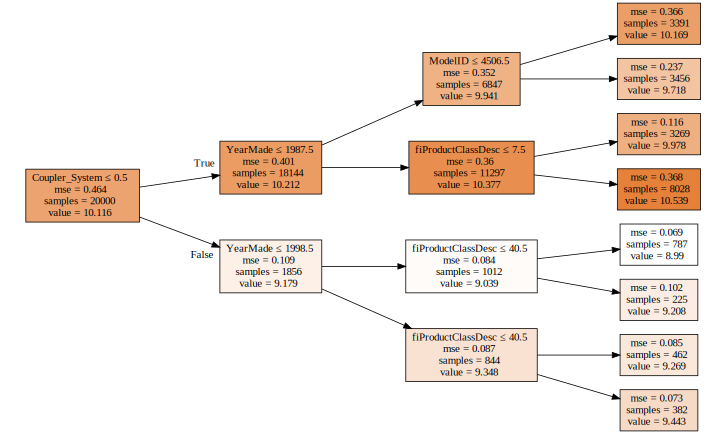

In [0]:
draw_tree(m.estimators_[0], df_trn, precision=3)

##TREES
So in the above trees Coupler Systems is the first criteria under which data woul be split. In the is case mse would the mean square error when compared to the value. The value is the average of the complete dataset.i.e: When the next split is done this average is compared witht he predicted value and the mse is noted and wherever the mse is higher or the data makes far apart distances then its split accordingly.

Let's see what happens if we create a bigger tree. `

In [0]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[2.175583928816829e-17, 0.4833426454322039, 1.0, 0.5827866433618324]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results. Here we do not give a limit to splitting the data and therefore the training data will fit perfectly and give us a score of 1. but the validation shows that score is only 0.73. This is because the tree has split to such a maximum that all of the training data has been accomodated and that therefore the training set can be predicted properly but validation cannot be predicted properly

## Bagging

### Intro to bagging

To learn about bagging in random forests, let's start with our basic model again.

Now what is bagging? In this case we randmly take 10 datasets from the training data set and try to make a prediction with one set of decision tree. Next we take another bunch of 10 data sets and then use this to make another decision tree and this would go on till we have say 10 different decision trees with 10 different insights. 

We would then average these 10 trees and  that erroe would be less(I am not sure what would happen when we average the results of these 10 decision trees. But this is the rough idea behind the baggin setup

In [0]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11216229404450608, 0.35969953154399914, 0.9728888373160977, 0.7689384308050888]


We'll grab the predictions for each individual tree, and look at one example.
In the below code we can see that prediction has been done for each value of the validation set for all the 10 estimators and the next line of code (10,12000) has 10 predicted values for the all the 12000 validation set values. It can also be observed that the each indiual value for a validation row has 10 different mean values and when the average of them is taken they are very close to the predicted value

In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([9.15905, 9.68034, 8.9872 , 8.95545, 9.23503, 8.9872 , 8.9872 , 8.9872 , 8.9872 , 8.95545]),
 9.092130441138178,
 9.104979856318357)

In [0]:
preds.shape

(10, 12000)

In the below code, it can be see that the validaiton set mean value has been taken with respect one tree,twot ree and till all the 10 trees and the rmse error has been plotted and it can be seen that the grpah value is increasing.

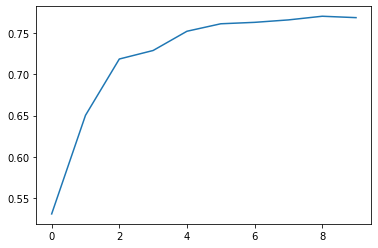

In [0]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)
In the below code they try increasing the number of trees to 20 and see what happens, these tree numbers are called **hyper parameters**,when we fine tune the hyper parameters we can see increment in value

In [0]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10063602769794644, 0.35123550171951673, 0.978174643393295, 0.7796846346585299]


In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09875544684341411, 0.3628293799398499, 0.9787148291657832, 0.764899871122278]


In [0]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09332103042064856, 0.33820806964475486, 0.9812321973763066, 0.7957246772757582]


### Out-of-bag (OOB) score

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

The above idea is that we use roughly only 63% of the total rows for training for each decision tree cause we do replacement as well ,i.e: use a row and then replace and use it again in another tree, therefore the rest of the data is left idel and as a result of which we can use that data to get see if we are overfitting.

In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07834913369899411, 0.2381470315156078, 0.9871706922297334, 0.8987165890317587, 0.9082572705861006]


In [0]:
set_rf_samples(50000)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=2, 
                        max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.06316947010741239, 0.33949711075299427, 0.9914005862660219, 0.7941645661037273, -6.116365999391113]


In [0]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.19 s, sys: 41 ms, total: 1.23 s
Wall time: 1.24 s


(9.569112492381477, 0.553421222820228)

## **Confidence Interval and understanding**

In [0]:
set_rf_samples(50000)

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

NameError: ignored

In the below code we predict the sale value from each estimator and then take the average for all of them. Similary we also do the standard deviation as well and see the output for the first row

In [0]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.27 s, sys: 32 ms, total: 1.3 s
Wall time: 1.31 s


(9.168782546795887, 0.17465047780961285)

Here we make a copy of the validation dataframe and we add the prediction and mean for each row and also plot just the histogram for just the three sets of bar graphs

In [0]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 783 ms, sys: 458 ms, total: 1.24 s
Wall time: 3.38 s


(9.168782546795887, 0.17465047780961285)

In the above code, we run parallel trees which makes use of all of our computer cores by simentaneously running the multiple trees on different cores. For parralled trees to work we need the Random Forest model(m) and the fucntion that we are trying to obatin the value for in this case it get_preds

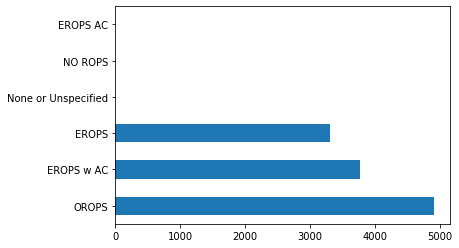

In [0]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [0]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.835224,0.285210
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.595863,0.267681
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.682768,0.230531


This shows that our validation set time difference is making an impact, as is model over-fitting. 
enc_summ is a dataframe that is grouped by the enclosure with the prediction mean and standard deviation.  therefore in the below st.dev we check if its isnull and if it isnt we only take those rows and then plot a bargraph with columns OROPS,EROPS and EROPS w AC

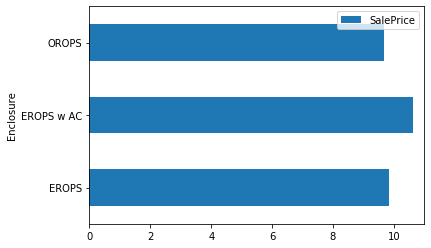

In [0]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

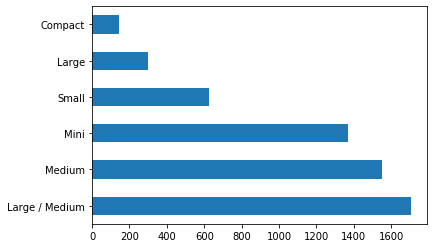

In [0]:
raw_valid.ProductSize.value_counts().plot.barh();

In [0]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.841009,0.326899
Large,10.470589,10.420628,0.371913
Large / Medium,10.691871,10.653529,0.321263
Medium,10.681511,10.631893,0.289936
Mini,9.535147,9.558108,0.234703
Small,10.324448,10.349606,0.290272


In [0]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Large             0.035690
Compact           0.033218
Large / Medium    0.030156
Small             0.028047
Medium            0.027270
Mini              0.024555
dtype: float64

In the below code we learn to do feature importance. This is so as to understand which of the features that are important and relevant and which arent

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [0]:
fi = rf_feat_importance(m, df_trn); 
fi[:10]

,cols,imp
37,Coupler_System,0.198523
5,YearMade,0.175565
13,ProductSize,0.105597
14,fiProductClassDesc,0.104038
2,ModelID,0.092845
63,saleElapsed,0.078055
19,Enclosure,0.038368
8,fiModelDesc,0.030565
10,fiSecondaryDesc,0.027692
0,SalesID,0.025336


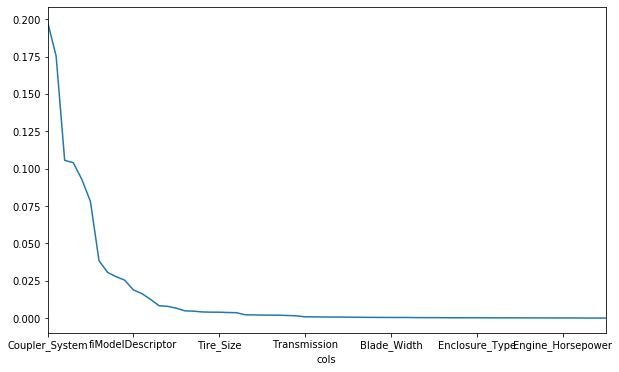

In [0]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

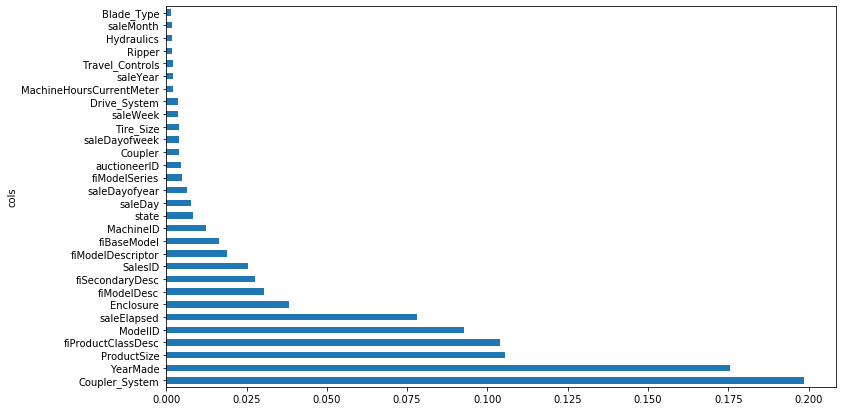

In [0]:
def plot_fi(fi): 
  return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [0]:
to_keep = fi[fi.imp>0.005].cols; 
len(to_keep)


16

In [0]:
df_keep = df_trn[to_keep].copy() ## Here we will add the data with only the required columns which is to_keep columns and copy that to df_keep
X_train, X_valid = split_vals(df_keep, n_trn)
y_train, _ = split_vals(y_trn, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                       max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)
#[0.20685390156773095, 0.24454842802383558, 0.91015213846294174, 0.89319840835270514, 0.8942078920004991]

[0.12548877557887733, 0.22583691336893946, 0.9670887339191502, 0.9089168938039976, 0.9083836361447489]


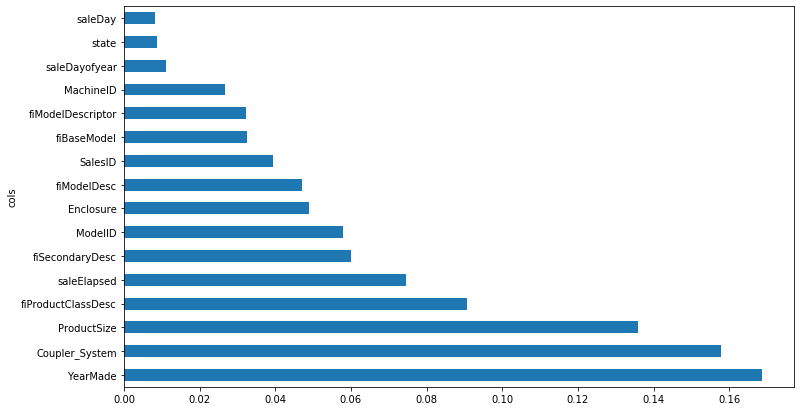

In [0]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In the above code we do feature importance that is.. we look at the importance of each column and then only take up the ones that have an importance that are greater than 0.005 Using only these columns we are trying to fit the values. 

Next we will shuffle values for a specific column and see how much it affecct the r square value and similarly try if for other columns and see how much r square value's affect each columns

## One hot encoding

In  one hot encoding what we do is say there are categorical variables like High,Medium, Low or more categories, instead of splitting between them what we can do it take each of them and make colums like 1 and 0. This is because when we do that we the splits become easier where the trees can take each column and see which split becomes easier. We should do this only forcateogrical vaariables and there for only things that are having less than 6 types and not for things like zipcode.

In [0]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)  
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
       max_features=0.6, n_jobs=-1, oob_score=True) 
m.fit(X_train, y_train) 
print_score(m)

[0.11790061896987737, 0.23329938295318106, 0.9709486046662393, 0.9027980104438841, 0.9105262948410479]


The R square neceesirly doenst improve but if we look ar the bar charts below we can that there is a new feature that is more important than the previous. The new columns added to the dataset will be having proc_df puts the name of the variable, an underscore, and the level name

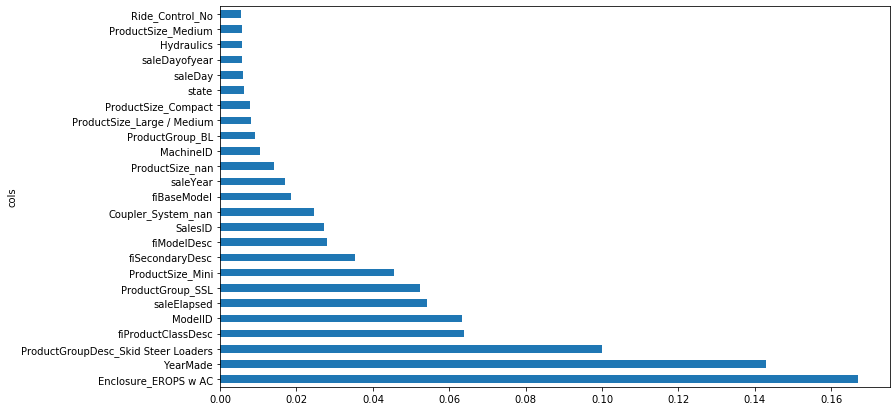

In [0]:
fi = rf_feat_importance(m, df_trn2);
def plot_fi(fi): 
  return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
  
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

## Cluster Analysis

This is so as to produce a dendogram with all the columns
The closer the line is towards the right, the more related they are. The more distant they are, the less they are corelated

In the code below we have the diagram for the dendogram

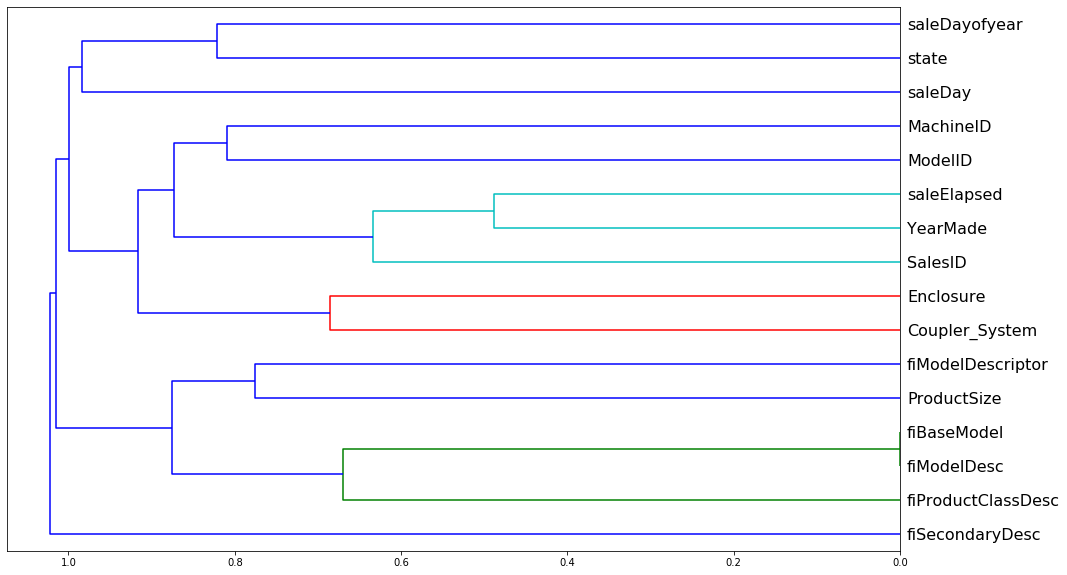

In [0]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, 
      orientation='left', leaf_font_size=16)
plt.show()

Below we define a function to see the oobscore for columns that are redundant and we wish to see whether removing columns improved the oob score. This is what is shown below

In [0]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, 
           max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_



In [0]:
get_oob(df_keep)


0.9053224115231698

In [0]:
for c in ('saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleElapsed 0.8445639377931297
fiModelDesc 0.904555429753435
fiBaseModel 0.9048973037045545
Coupler_System 0.90462463346918


Next we remove the one column from each dataset and see what happens to the score. We can see that the score doesnt decrease much and therefore and the redundant columns can be removed and the forests regressor are run again.

In [0]:
to_drop = ['fiBaseModel']
df_keep.columns

Index(['Coupler_System', 'YearMade', 'ProductSize', 'fiProductClassDesc',
       'ModelID', 'saleElapsed', 'Enclosure', 'fiModelDesc', 'fiSecondaryDesc',
       'SalesID', 'fiModelDescriptor', 'MachineID', 'state', 'saleDay',
       'saleDayofyear'],
      dtype='object')

In [0]:
n_trn

389125

In [0]:
X_train, X_valid = split_vals(df_keep, n_trn)


In [0]:
reset_rf_samples()
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)
#[0.12615142089579687, 0.22781819082173235, 0.96677727309424211, 0.90731173105384466, 0.9084359846323049]

[0.12736916004351273, 0.22985107245620856, 0.966095027561241, 0.9056501871824657, 0.9073115882853732]


## Partial Dependance

In [0]:
from pdpbox import pdp
from plotnine import *
set_rf_samples(50000)

In [0]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
       max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

In [0]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

In [0]:
!pip install ggplot


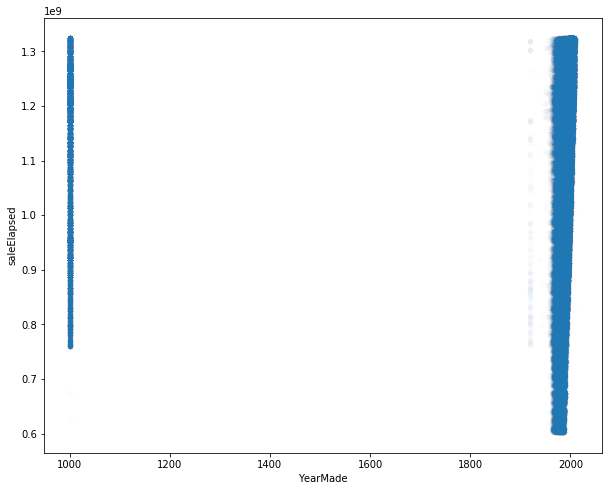

In [0]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));


In the above plot we can see that Year made and the salesElapsed are linearly related. It shows us that YearMade actually has a whole bunch that are a thousand. Clearly, this is where I would tend to go back to the client and say okay, I’m guessing that these bulldozers weren’t actually made in the year 1000 and they would presumably say to me “oh yes, they are ones where we don’t know where it was made”.

Therefore after year 1930 only we see the data and it is plotted

In [0]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)
from ggplot import aes
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, 
       method='loess')

I would have expected that stuff that’s sold more recently would probably be more expensive because of inflation and they are more current models. The problem is that when you look at a univariate relationship like this, there is a whole lot of collinearity going on — a whole lot of interactions that are being lost. For example, why did the price drop? Is it actually because things made between 1991 and 1997 are less valuable? Or is it actually because most of them were also sold during that time and there was maybe a recession then? Or maybe it was because products sold during that time, a lot more people were buying types of vehicles that were less expensive? There’s all kind of reasons for tha

So what we really want to be able to do is say “well, what’s the relationship between SalePrice and YearMade all other things being equal. “All other things being equal” basically means if we sold something in 1990 vs. 1980 and it was exactly the same thing to exactly the same person in exactly the same auction so on and so forth, what would have been the difference in price? To do that, we do something called a partial dependence plot

In [0]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

Here is our dataset of 500 auctions and here is our columns, one of which is the thing that we are interested in which is YearMade. We are now going to try and create a chart where we say all other things being equal in 1960, how much did things cost in auctions? The way we are going to do that is we are going to replace the YearMade column with 1960. We are going to copy in the value 1960 again and again all the way down. Now every row, the year made is 1960 and all of the other data is going to be exactly the same. We are going to take our random forest, we are going to pass all this through our random forest to predict the sale price.

Randomly shuffling the column tells us how accurate it is when you don’t use that column anymore. Replacing the whole column with a constant estimates for us how much we would have sold that product for in that auction on that day in that place if that product had been made in 1961. We then take the average of all of the sale prices that we calculate from that random forest. We do it in 1961 and we get this value:

In [0]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, 
                        n_cluster_centers=clusters)
plot_pdp('YearMade')



So what the partial dependence plot (PDP)here shows us is each of these light blue lines actually is showing us all 500 lines [1:18:01]. So for row number 1 in our dataset, if we sold it in 1960, we are going to index that to zero so call that zero. If we sold it in 1970 that particular auction, it would have been here, etc. We actually plot all 500 predictions of how much every one of those 500 auctions would have gone for if we replaced its YearMade with each of these different values. Then this dark line is the average. So this tells us how much would we have sold on average all of those auctions for if all of those products were actually made in 1985, 1990, 1993, etc.

There is another cool thing we can do with PDP which is we can use clusters. What clusters does is it uses cluster analysis to look at each one of the 500 rows and say do some those 500 rows move in the same way. We could kind of see it seems like there’s a whole a lot of rows that go down and then up, and there seems to be a bunch of rows that go up and then go flat. It does seem like there’s some kind of different types of behaviors being hidden and so here is the result of doing that cluster analysis:

We still get the same average but it says here are five most common shapes that we see. And this is where you could then go in and say all right, it looks like some kinds of vehicle, after 1990, their prices are pretty flat. Before that, they were pretty linear. Some other kinds of vehicle were exactly the opposite, so different kinds of vehicle have these different shapes. So, this is something you could dig into.

 Bulldozers made in 2010 probably are not close to the type of bulldozers that were made in 1960. If you are taking something that would be so very different, like a 2010 bulldozer, and then trying to just drop it to say “oh if it was made in 1960” that may cause poor prediction at a point because it’s so far outside of the training set [1:26:12]. Absolutely. That’s a good point. It is a limitation, however, if you’ve got a datapoint that’s in a part of the space that it has not seen before, like maybe people didn’t put air conditioning in bulldozers in 1960 and you are saying how much would this bulldozer with air conditioning would have gone for in 1960, you don’t really have any information to know that. This is still the best technique I know of but it’s not perfect. And you kind of hope that the trees are still going to find some useful truth even though it hasn’t seen that combination of features before. But yeah, it’s something to be aware of.

In [0]:
plot_pdp('YearMade', clusters=5) 

In [0]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                          max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

Based on the earlier interaction analysis, I’ve tried, first of all, setting everything before 1950 to 1950 because it seems to be some kind of missing value [1:31:25]. I’ve set age to be equal to saleYear - YearMade. Then I tried running a random forest on that. Indeed, age is now the single biggest thing, saleElapsed is way back down here, YearMade is back down here. So we’ve used this to find an interaction.

## Tree Intepreter


” So in general, you’ve made a prediction from some model and somebody asks why. This is where we use this method called tree interpreter. What tree interpreter does is it allows us to take a particular row.

In [0]:
from treeinterpreter import treeinterpreter as ti
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)



We pick row numbeer zero

In [0]:
row = X_valid.values[None,0]; row


In [0]:
prediction, bias, contributions = ti.predict(m, row)

### Tree building parameters

We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [0]:
reset_rf_samples()

Let's get a baseline for this full set to compare to.

In [0]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [0]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [0]:
t=m.estimators_[0].tree_

In [0]:
dectree_max_depth(t)

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

min_sample_leaf = This is for limiting the number of splits, that is instead of splitting into every single leaf we limit the trees to be splitted to an extent such that each leaf will have a minimum of 5 rows of data.

In [0]:
t=m.estimators_[0].tree_

In [0]:
dectree_max_depth(t)

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

- None
- 0.5  - max_features: this is that the number of columns are randomly taken. Instead of taking all the columns for consideration  in each split, we take 50% of the columns for each split and then for the next split we take another 50 and so on
- 'sqrt'

- 1, 3, 5, 10, 25, 100

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

We can't compare our results directly with the Kaggle competition, since it used a different validation set (and we can no longer to submit to this competition) - but we can at least see that we're getting similar results to the winners based on the dataset we have.

The sklearn docs [show an example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) of different `max_features` methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models:
![sklearn max_features chart](http://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png)